<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-5">PCA</a></span></li></ul></div>

# Dependencies

In [1]:
pacman::p_load(ggplot2, ggbiplot, immunarch)

# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/Immune_diversity.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

# Main

In [4]:
load(file = paste0(gitpath, "data/pbmc_sampleprocessing.RData"))

In [5]:
metadata <- read.csv(file = paste0(datapath, "INT_metadata_flow.csv"),header = T, stringsAsFactors = F)

In [6]:
load(file = paste0(datapath,"capTCRseq/divstats_lst_TRA.RData"))
load(file = paste0(datapath,"capTCRseq/divstats_lst_TRB.RData"))

In [7]:
pbmc_samples$sample_id <- NULL

In [8]:
head(divstats_lst_TRB$PBMC)

,sample_id,Patient.x,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,⋯,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,Sample,Group,Patient.y,Cycle,basename
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,CHP_303_05,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.481,158.597,161.725,2.010,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt,PBMC,CHP,CHP_303,5,CHP_303-05-PBMC-DNA
2,CHP_315_05,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.629,9.026,9.138,0.749,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,PBMC,CHP,CHP_315,5,CHP_315-05-PBMC-DNA
3,CHP_319_05,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.238,10.248,11.626,1.264,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,PBMC,CHP,CHP_319,5,CHP_319-05-PBMC-DNA
4,CHP_320_01,CHP_320,1,8.9,0,6,AML,8.9,NA,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,CHP_320_02,CHP_320,2,3.5,0,6,AML,3.5,NA,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,CHP_320_03,CHP_320,3,13.2,0,6,AML,13.2,NA,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [9]:
all <- merge(pbmc_samples, divstats_lst_TRB$PBMC, by.x = "mysample_id", by.y = "sample_id")

# divstats_lst_TRB contains all samples with flow data, remove those without tcr data
all <- all[!is.na(all$basename),]

Warning message:
“Removed 47 rows containing missing values (geom_point).”


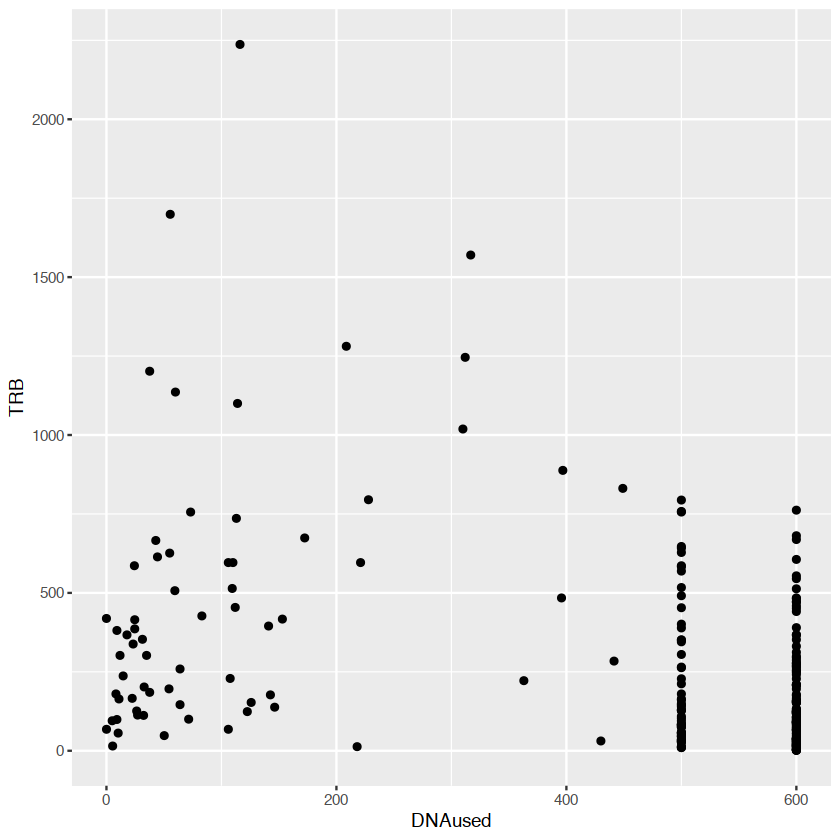

In [10]:
ggplot(data = all, aes( x = DNAused, y = TRB)) + geom_point()

Warning message:
“Removed 47 rows containing missing values (geom_point).”


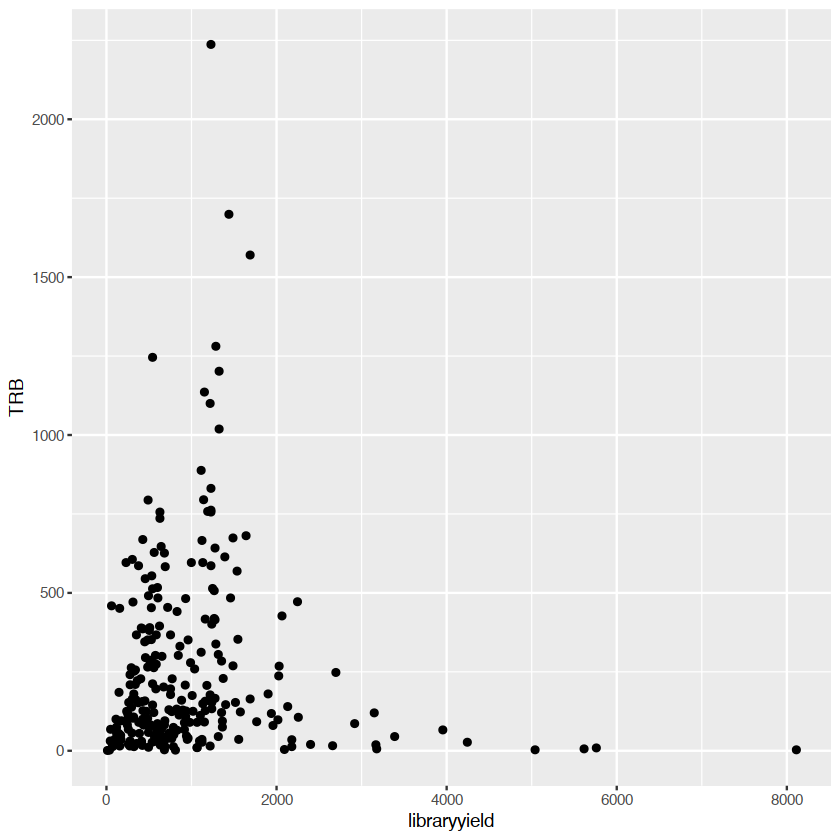

In [10]:
ggplot(data = all, aes( x = libraryyield, y = TRB)) + geom_point()

Warning message:
“Removed 47 rows containing missing values (geom_point).”


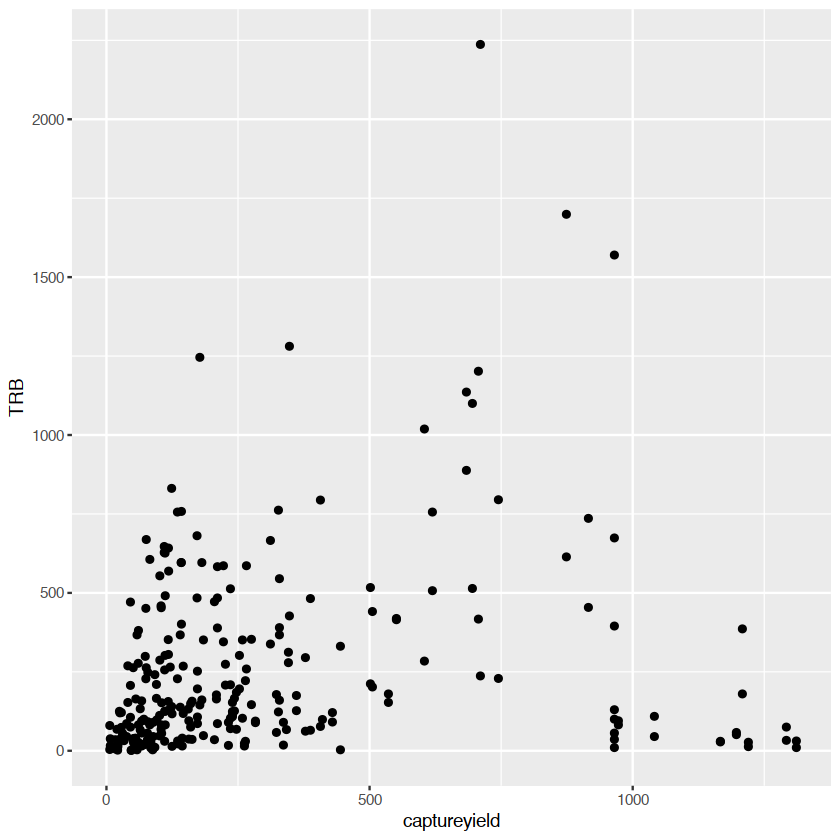

In [11]:
ggplot(data = all, aes( x = captureyield, y = TRB)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



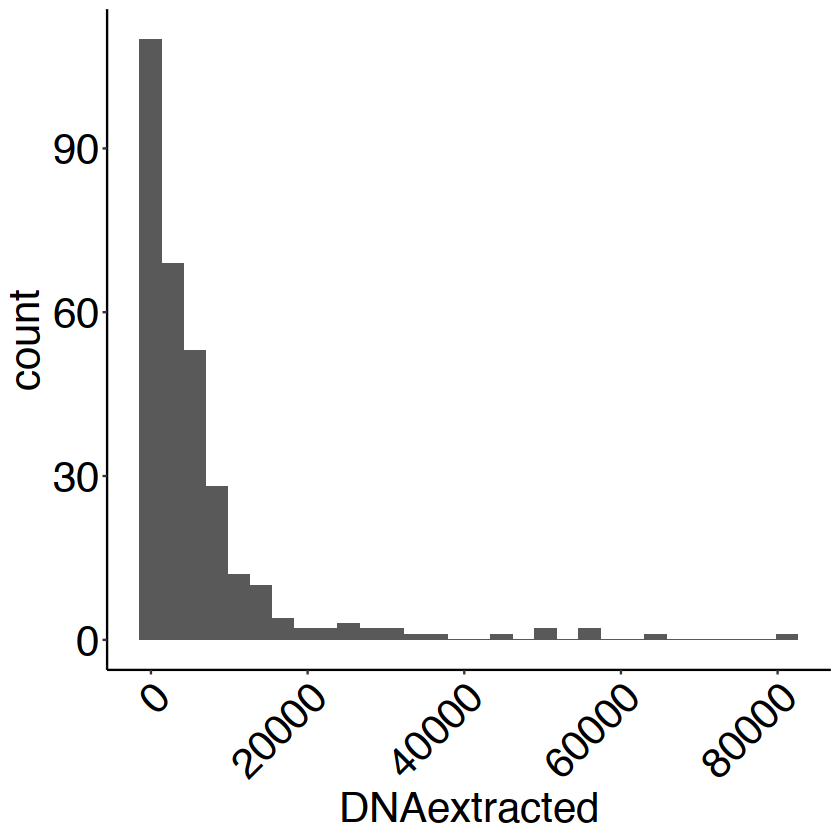

In [12]:
histp(all, "DNAextracted")

In [13]:
p <- ggplot(data = all, aes( x = capbatch, y = TRB)) + geom_boxplot() + myplot + myaxis

In [14]:
p1 <- ggplot(data = all, aes( x = libbatch, y = TRB)) + geom_boxplot() + myplot + myaxis

In [15]:
pdf(paste0(plotpath, "qc_libbatch.pdf"),
    width = 40, height = 40)
p1
dev.off()

Warning message:
“Removed 47 rows containing non-finite values (stat_boxplot).”


pdf 
  2

In [16]:
pdf(paste0(plotpath, "qc_capbatch.pdf"),
    width = 40, height = 40)
p
dev.off()

Warning message:
“Removed 47 rows containing non-finite values (stat_boxplot).”


pdf 
  2

# PCA

remove failed samples

In [10]:
all <- all[ !is.na(all$deepseq),]

In [11]:
load(paste0(datapath, "capTCRseq/int_load.RData"))

In [12]:
#remove CLONES_TRB from names
names(int_load$data) <- gsub("CLONES_TRB", "", names(int_load$data))

In [13]:
#remove scores from V and J
for(i in 1:length(int_load$data)){
    int_load$data[[i]] <- as.data.frame(int_load$data[[i]])
    int_load$data[[i]][,"V.name"] <- gsub("\\*.*", "", int_load$data[[i]][,"V.name"])
    int_load$data[[i]][,"D.name"] <- gsub("\\*.*", "", int_load$data[[i]][,"D.name"])
    int_load$data[[i]][,"J.name"] <- gsub("\\*.*", "", int_load$data[[i]][,"J.name"])
    int_load$data[[i]] <- as_tibble(int_load$data[[i]])
}

In [14]:
#subset to PBMC samples
int_load$data <- int_load$data[ grepl("PBMC", names(int_load$data))]

In [15]:
int_load$meta <- all

In [16]:
int_load$meta <- int_load$meta[ , c("basename", colnames(int_load$meta)[1:77])]

In [17]:
int_load$meta$Sample <- NULL
colnames(int_load$meta)[1] <- "Sample"

In [18]:
int_load$data <- int_load$data[ all$basename]

In [19]:
int_load$meta <- as_tibble(int_load$meta)

In [20]:
length(int_load$data)
dim(int_load$meta)

[1] 258

[1] 258  77

In [75]:
int_gu <- geneUsage(int_load$data, "hs.trbv", .norm = F)

In [76]:
dim(int_gu)

[1]  61 259

In [77]:
int_gu[is.na(int_gu)] <- 0

In [78]:
gu <- t(as.matrix(int_gu[, -1]))

In [79]:
mypca <- immunr_pca(gu)

In [80]:
int_load$meta$tmp <- NA
int_load$meta$tmp [ int_load$meta$captureyield > 600] <- "High"

int_load$meta$tmp [ int_load$meta$captureyield < 100] <- "Low"

In [84]:
mypca$x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61
CHP_303-05-PBMC-DNA,-0.1924099,0.70378702,-0.14526276,0.6362451,0.659726320,-0.249193086,0.012172913,0.25548647,-0.12027439,0.755009603,⋯,-0.09243625,-0.038227126,0.196368443,0.715885919,0.28509093,0.0859859765,-0.009205020,-0.353099120,0.279131544,0.052616270
CHP_315-05-PBMC-DNA,-4.4411541,-0.12517308,-0.23052989,0.1302875,-0.153419133,0.037937110,-0.006863967,-0.03279105,0.17120556,0.032786951,⋯,0.15248829,0.043077102,-0.166056769,0.030269899,0.20295080,0.0441608387,0.099078289,0.060319719,0.155476485,-0.006007754
CHP_319-05-PBMC-DNA,-4.7174591,-0.15524897,-0.28370662,0.1246751,-0.215279266,0.047362499,0.083347488,-0.14588371,0.06179906,-0.041862833,⋯,-0.16832825,-0.010456345,0.144745624,0.004772760,0.05278556,0.1319366258,0.010543822,0.075189180,0.024935546,-0.003074362
CHP_323-03-PBMC-DNA,-4.1850687,-0.02420537,-0.17514021,0.1269224,-0.080858208,-0.064654348,-0.032383749,-0.12468670,0.13287478,-0.029994533,⋯,0.14928393,-0.010647651,-0.206606666,0.097391773,0.08731746,-0.0111158019,-0.163241884,0.037856000,-0.181626301,-0.129716697
CHP_323-04-PBMC-DNA,-4.5521147,0.08974474,-0.43292418,0.2216164,-0.033708709,-0.041329766,0.122923385,-0.07389880,-0.03202828,-0.042944793,⋯,-0.12023110,-0.029458943,-0.057184700,-0.086366647,0.01028068,0.0489948562,0.060365081,-0.138588446,0.080599094,-0.007130368
CHP_323-05-PBMC-DNA,-2.0517471,-0.09527673,-0.14835343,0.5479575,-0.049446904,-0.104041881,-0.020661863,-0.31440442,0.17471228,-0.352543615,⋯,-0.11122039,-0.156211689,0.009253524,0.238039249,0.05576303,0.1076219605,-0.037219685,0.136149910,-0.149804444,-0.234601956
CHP_324-05_PBMC-DNA,-0.7129108,-0.77169104,-0.67682763,0.3512846,-0.189648423,0.020547392,-0.003983607,-0.44488686,-0.02965600,0.291963108,⋯,0.16489292,-0.612859614,-0.423217377,0.173142543,-0.25943858,0.2314663328,-0.196255985,0.029490843,-0.194023103,0.019916560
CHP-328-04-PBMC-DNA,4.3944186,-0.61591500,0.12247292,0.3448743,-1.176688210,-0.254749583,-0.457382444,0.95252012,-0.24044293,-2.331821334,⋯,-0.47046900,0.055054854,-0.136926650,-0.125257708,0.15071705,0.0904524138,0.181499922,-0.135415093,0.118980507,0.168113833
CHP-328-05-PBMC-DNA,-1.6262315,0.62717516,0.11950976,-0.7861915,1.023993865,0.901273340,2.652484531,-1.51685053,-0.49006599,0.770401544,⋯,0.18171185,0.240568076,0.266141701,-0.056311133,0.03996771,-0.2081989480,-0.002049620,0.199062301,0.105717478,-0.215423594
CHP_330-05-PBMC-DNA,-2.4111365,-0.34875868,-0.14048630,0.3006939,0.210907364,-0.125960366,0.066148295,-0.18752694,0.07059641,0.136926242,⋯,-0.15068220,-0.006527281,0.195352710,0.200803125,-0.02882322,-0.0008305988,-0.167647282,0.302945021,-0.043533445,0.259592115


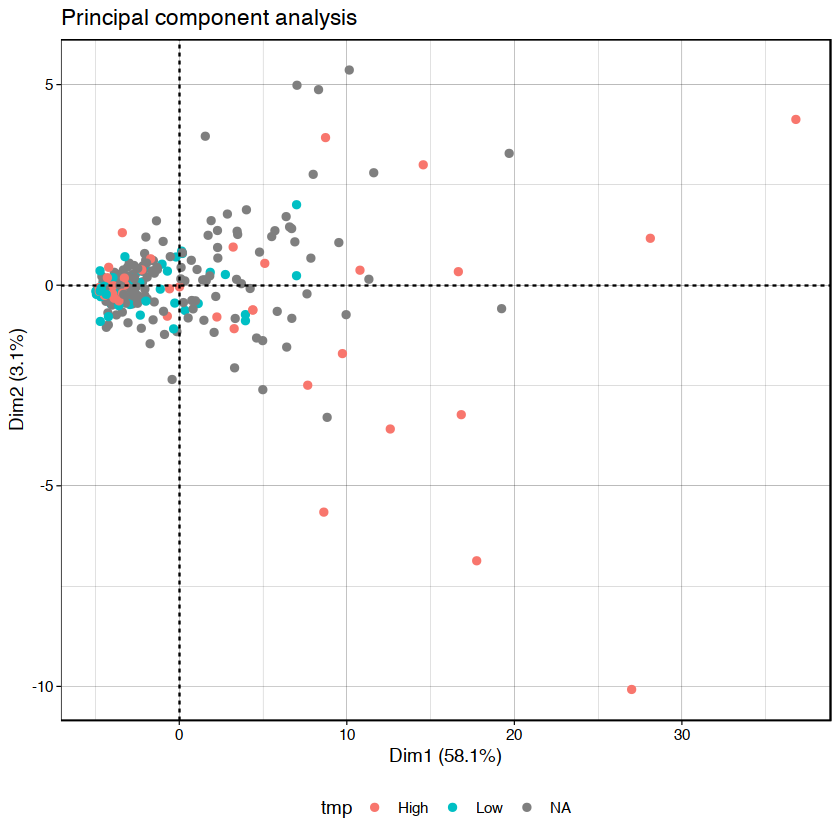

In [81]:
vis(mypca, .by = "tmp", .meta = int_load$meta, 
    .ellipse = FALSE, .text = FALSE) + theme(legend.position = "bottom")

In [58]:
imm_tsne <- geneUsageAnalysis(imm_gu, "js", .perp = .01, .verbose = F)
mytsne <- immunr_tsne(imm_tsne)

Warning message in rep(no, length.out = len):
“'x' is NULL so the result will be NULL”


ERROR: Error in ans[npos] <- rep(no, length.out = len)[npos]: replacement has length zero


In [51]:
pdf(paste0(plotpath, "tmp.pdf"),
   width = 10, height = 10)
vis(mytsne)
dev.off()

pdf 
  2

In [ ]:
imm_tsne$batch <- NA

imm_tsne$batch <- all$capbatch[ all$sample_id]

In [19]:
head(all)

,mysample_id,sample_id,Shipped,DNAextracted,DNAused,libbatch,librarypassed,Library preparation,libraryyield,captureyield,⋯,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,Sample,Group.y,Patient.y,Cycle
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
1,CHP_303_05,303-05,n = 320,3820,600,190607_M04827_0206_000000000-D6C75,Passed,n = 281,2697.60,78.66,⋯,191.496,194.714,1.440,158.597,161.725,1.995,PBMC,CHP,CHP_303,5
2,CHP_315_05,315-05,n = 320,11200,600,190607_M04827_0206_000000000-D6C75,Passed,n = 281,537.60,84.36,⋯,15.470,15.793,0.589,9.026,9.138,0.676,PBMC,CHP,CHP_315,5
3,CHP_319_05,319-05,n = 320,13900,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 281,1219.20,144.02,⋯,11.878,13.439,1.265,10.248,11.626,1.148,PBMC,CHP,CHP_319,5
4,CHP_323_03,323-03,n = 320,13600,600,190607_M04827_0206_000000000-D6C75,Passed,n = 281,3388.80,38.38,⋯,37.722,37.986,0.372,33.204,33.544,0.557,PBMC,CHP,CHP_323,3
5,CHP_323_04,323-04,n = 320,3200,600,190905_M04827_0257_000000000-D73M3,Passed,n = 281,353.28,262.20,⋯,13.184,13.414,0.512,8.985,9.094,0.557,PBMC,CHP,CHP_323,4
6,CHP_323_05,323-05,n = 320,2840,600,190905_M04827_0257_000000000-D73M3,Passed,n = 281,262.08,239.40,⋯,81.753,85.174,2.311,32.669,33.190,2.511,PBMC,CHP,CHP_323,5


In [16]:
head(imm_tsne)

,DimI,DimII
CHP_10YO-M_PBMC_DNA,88.55822,-798.9136
CHP_11YO-M_PBMC_DNA,224.82759,-766.3616
CHP_15YO-F-A_PBMC_DNA,-40.10901,295.3115
CHP_15YO-F-B_PBMC_DNA,-523.24063,231.7664
CHP_15YO-M_PBMC_DNA,487.52400,125.3986
CHP_16YO-M_PBMC_DNA,145.20654,-175.5150


In [39]:
p3 <- vis(imm_cl_tsne, .plot = "clust")

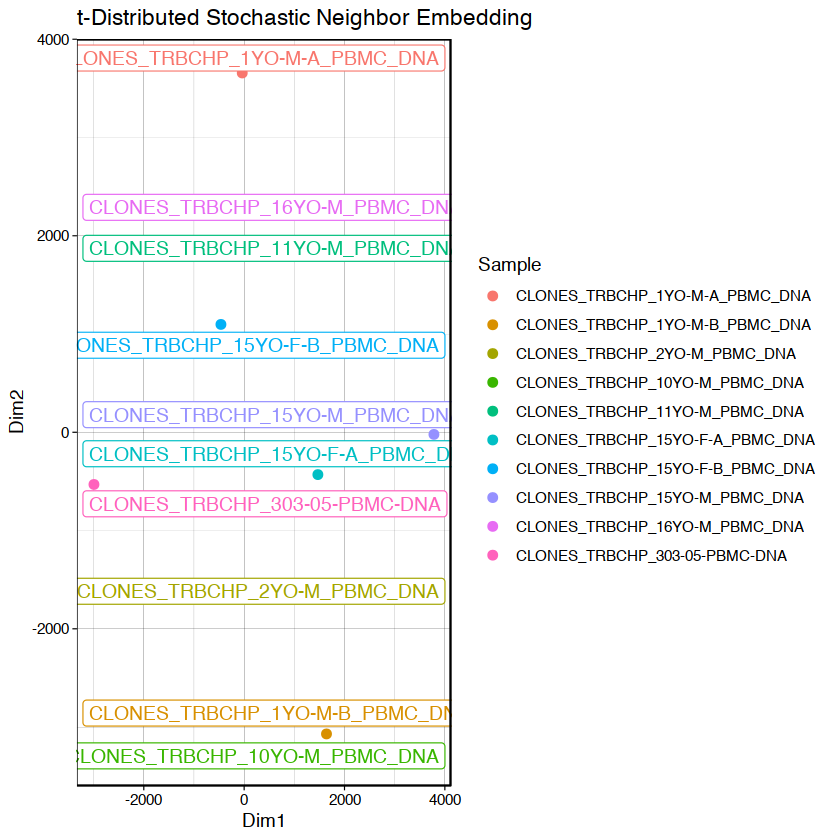

In [40]:
p3

In [24]:
head(int_load$data[[1]] )

Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,D.end,⋯,CDR2.nt,CDR2.aa,FR1.nt,FR1.aa,FR2.nt,FR2.aa,FR3.nt,FR3.aa,FR4.nt,FR4.aa
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
3012,0.20644277,TGTGCCAGCAGCCAATATACGGCAGATACGCAGTATTTT,CASSQYTADTQYF,TRBV13,NA,TRBJ2-3,12,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1590,0.10897875,TGTGCCAGCAGTGATGGACGCTACGGGCGGGACAGTAACACTGAAGCTTTCTTT,CASSDGRYGRDSNTEAFF,TRBV2,TRBD1,TRBJ1-1,14,27,35,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1301,0.08917066,TGTGCCAGCAGTTTAAACTCGGGCGGGACATATGGCTACACCTTC,CASSLNSGGTYGYTF,TRBV12-4,TRBD1,TRBJ1-2,15,23,30,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1214,0.08320768,TGTGCCAGCTACGAGGGGGAGTGGAACACTGAAGCTTTCTTT,CASYEGEWNTEAFF,TRBV2,TRBD1,TRBJ1-1,9,13,19,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1088,0.07457162,TGTGCCAGCAGTTTAGGGCCGAACACTGAAGCTTTCTTT,CASSLGPNTEAFF,TRBV12-4,NA,TRBJ1-1,16,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
860,0.05894448,TGTGCCAGTAGTAACGGCTCGGGGCGCCCTGAAGCTTTCTTT,CASSNGSGRPEAFF,TRBV19,TRBD1,TRBJ1-1,13,20,28,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [25]:
data(immdata)

In [ ]:
imm_cl_tsne <- geneUsageAnalysis(imm_gu, "js+tsne+kmeans", .perp = .01, .verbose = F)

In [29]:
geneUsage(immdata$data)
#gu[is.na(gu)] <- 0

Names,A2-i129,A2-i131,A2-i133,A2-i132,A4-i191,A4-i192,MS1,MS2,MS3,MS4,MS5,MS6
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TRBV10-1,24,28,NA,16,29,6,19,4,43,19,13,21
TRBV10-2,42,60,8,29,28,16,25,35,63,39,22,43
TRBV10-3,230,282,135,108,376,215,195,142,304,262,179,442
TRBV11-1,21,14,26,17,17,16,14,10,16,32,14,20
TRBV11-2,183,172,125,161,95,113,94,105,174,174,122,94
TRBV11-3,8,11,5,24,2,7,4,13,13,13,3,32
TRBV12-4,603,459,313,433,333,557,406,606,452,646,537,951
TRBV12-5,37,54,8,38,18,17,7,17,25,32,16,24
TRBV13,44,53,45,78,29,43,39,28,31,33,28,47


In [32]:
imm_gu <- geneUsage(immdata$data, "hs.trbv", .norm = T)

In [33]:
head(imm_gu)

Names,A2-i129,A2-i131,A2-i133,A2-i132,A4-i191,A4-i192,MS1,MS2,MS3,MS4,MS5,MS6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRBV10-1,0.003674219,0.004272852,NA,0.002336107,0.0056354450,0.001030397,0.0035152636,0.0005598321,0.006655317,0.002551363,0.0022980378,0.002834391
TRBV10-2,0.006429884,0.009156112,0.0012513687,0.004234195,0.0054411193,0.002747725,0.0046253469,0.0048985304,0.009750813,0.005237008,0.0038889871,0.005803752
TRBV10-3,0.035211268,0.043033725,0.0211168466,0.015768725,0.0730664594,0.036922549,0.0360777058,0.0198740378,0.047051540,0.035181952,0.0316422132,0.059657174
TRBV11-1,0.003214942,0.002136426,0.0040669482,0.002482114,0.0033035367,0.002747725,0.0025901943,0.0013995801,0.002476397,0.004297032,0.0024748100,0.002699420
TRBV11-2,0.028015922,0.026247520,0.0195526357,0.023507081,0.0184609405,0.019405805,0.0173913043,0.0146955913,0.026930816,0.023365113,0.0215662012,0.012687272
TRBV11-3,0.001224740,0.001678620,0.0007821054,0.003504161,0.0003886514,0.001202129,0.0007400555,0.0018194542,0.002012072,0.001745669,0.0005303164,0.004319071


In [27]:
all_subset <- all[ all$DNAused == 600,]

In [28]:
summary(all$DNAused)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   130.0   500.0   409.4   600.0   600.0       1 

In [101]:
forpca <- all_subset[c("DNAextracted", "libraryyield", "captureyield", "TRB", "Reads")]

In [102]:
mycancers <- all_subset$Tumor
mylibbatch <- all_subset$libbatch
mycapbatch <- all_subset$capbatch

In [103]:
my.pca <- prcomp(forpca, center = T, scale. = T) 

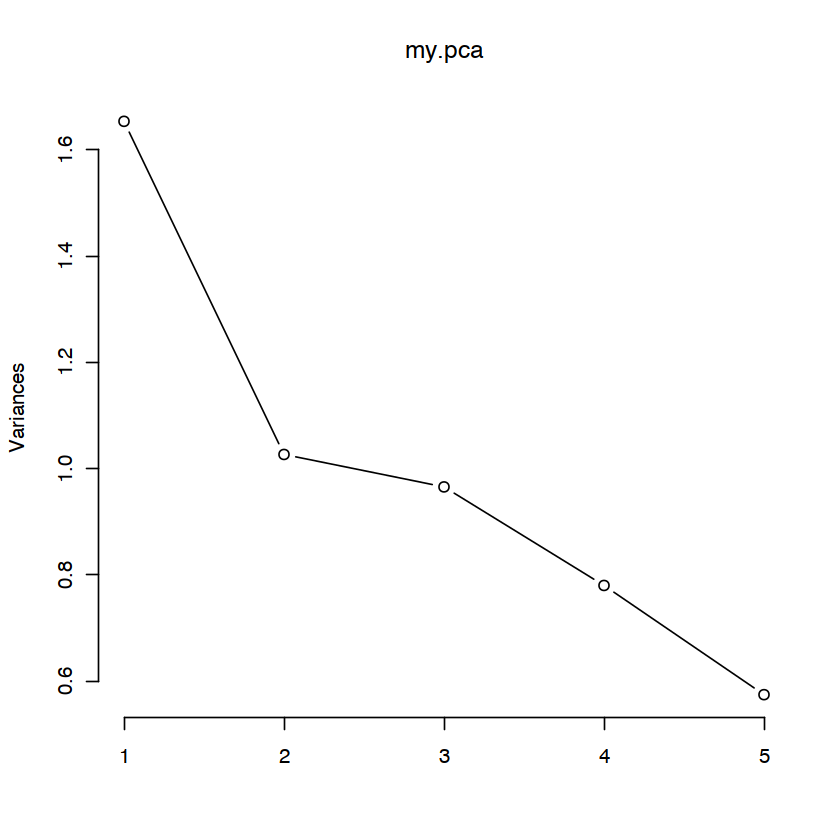

In [104]:
plot(my.pca, type = "l")

In [105]:
g <- ggbiplot(my.pca, #obs.scale = 1, var.scale = 1, 
              groups = mycapbatch, ellipse = TRUE, var.axes = TRUE,
              circle = FALSE) + myplot + myaxis + theme(legend.position = "none")# + scale_color_viridis_b()

In [106]:
pdf(paste0(plotpath, "pca_plot.pdf"),
    width = 20, height = 20)
g
dev.off()

pdf 
  2